# Cohort Analysis

Cohort analysis is a kind of behavioral analytics that breaks the data in a data set into related groups before analysis. These groups, or cohorts, usually share common characteristics or experiences within a defined time-span. It examine the behavior and performance of groups of users related by common attributes. A cohort is a group of users who share a common characteristic that is identified in this report by an Analytics dimension. The Cohort Analysis report lets you isolate and analyze cohort behavior. <br>
This analysis could be helpful for the business in order to take the marketing strategies or the money to be spended on the advertising and many more decisions as per the requiremennts from domain to domain.

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

# Reading Dataset

In [2]:
df = pd.read_excel("Online Retail.xlsx")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


# Data Preprocessing

In [3]:
def get_month(x):
    return dt.datetime(x.year, x.month, 1)
df['InvoiceMonth'] = df['InvoiceDate'].apply(get_month)

In [4]:
df['CohortMonth'] = df.groupby('CustomerID')['InvoiceMonth'].transform('min')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01


In [5]:
def get_date_int(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    date = df[column].dt.date
    return year, month, date

In [6]:
Invoice_Year, Invoice_Month, _ = get_date_int(df, 'InvoiceMonth')
Cohort_Year, Cohort_Month , _ = get_date_int(df, 'CohortMonth')

Year_Diff = Invoice_Year - Cohort_Year
Month_Diff = Invoice_Month - Cohort_Month

df['CohortIndex'] = Year_Diff*12 + Month_Diff +1
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth,CohortIndex
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,2010-12-01,1.0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,2010-12-01,1.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1.0


# Customer Cohort & Customer Retention by Cohort

In [7]:
df['CohortMonth'] = df['CohortMonth'].dt.to_period('m')

In [8]:
grouping = df.groupby(['CohortMonth', 'CohortIndex'])

In [9]:
cohort_data = grouping['CustomerID'].apply(pd.Series.nunique)
cohort_data = cohort_data.reset_index()
cohort_data.head()

,CohortMonth,CohortIndex,CustomerID
0,2010-12,1.0,948
1,2010-12,2.0,362
2,2010-12,3.0,317
3,2010-12,4.0,367
4,2010-12,5.0,341


In [10]:
# So we can see only 91 unique customers made 541909 purchases during this period. Let’s make the pivot table.
print(df.shape) 
print(cohort_data.shape)

(541909, 11)
(91, 3)


In [11]:
cohort_counts = cohort_data.pivot(index="CohortMonth",
                                  columns="CohortIndex",
                                  values="CustomerID")
customer_cohort = cohort_counts
customer_cohort

CohortIndex,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
CohortMonth,,,,,,,,,,,,,
2010-12,948.0,362.0,317.0,367.0,341.0,376.0,360.0,336.0,336.0,374.0,354.0,474.0,260.0
2011-01,421.0,101.0,119.0,102.0,138.0,126.0,110.0,108.0,131.0,146.0,155.0,63.0,NaN
2011-02,380.0,94.0,73.0,106.0,102.0,94.0,97.0,107.0,98.0,119.0,35.0,NaN,NaN
2011-03,440.0,84.0,112.0,96.0,102.0,78.0,116.0,105.0,127.0,39.0,NaN,NaN,NaN
2011-04,299.0,68.0,66.0,63.0,62.0,71.0,69.0,78.0,25.0,NaN,NaN,NaN,NaN
2011-05,279.0,66.0,48.0,48.0,60.0,68.0,74.0,29.0,NaN,NaN,NaN,NaN,NaN
2011-06,235.0,49.0,44.0,64.0,58.0,79.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,191.0,40.0,39.0,44.0,52.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,167.0,42.0,42.0,42.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


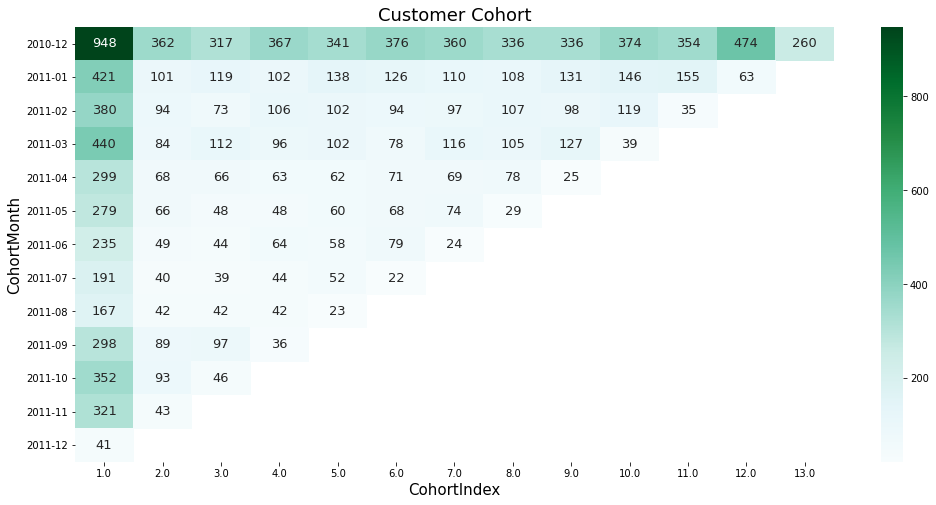

In [12]:
plt.figure(figsize=(17,8))
plt.title("Customer Cohort", fontsize= 18)
plt.xlabel('Cohort Index', fontsize= 15);
plt.ylabel('Cohort Month', fontsize= 15);
sns.heatmap(data=customer_cohort, annot=True, fmt='g', cmap="BuGn", annot_kws={"fontsize":13})
plt.show()

***The above figure shows that in first cohort month (i.e. December 2010), in 1st month there were 948 customers and in the 2nd month of first cohort only 362 customers retained from the 948 customers and so on. Similarly we could look over all of the cohorts and take decisions accordingly.***

In [13]:
cohort_sizes = cohort_counts.iloc[:,0]
cohort_sizes.head()

CohortMonth
2010-12    948.0
2011-01    421.0
2011-02    380.0
2011-03    440.0
2011-04    299.0
Freq: M, Name: 1.0, dtype: float64

In [14]:
retention = cohort_counts.divide(cohort_sizes, axis=0)
retention.round(3)*100
retention.head()

CohortIndex,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
CohortMonth,,,,,,,,,,,,,
2010-12,1.0,0.381857,0.334388,0.387131,0.359705,0.396624,0.379747,0.354430,0.354430,0.394515,0.373418,0.500000,0.274262
2011-01,1.0,0.239905,0.282660,0.242280,0.327791,0.299287,0.261283,0.256532,0.311164,0.346793,0.368171,0.149644,NaN
2011-02,1.0,0.247368,0.192105,0.278947,0.268421,0.247368,0.255263,0.281579,0.257895,0.313158,0.092105,NaN,NaN
2011-03,1.0,0.190909,0.254545,0.218182,0.231818,0.177273,0.263636,0.238636,0.288636,0.088636,NaN,NaN,NaN
2011-04,1.0,0.227425,0.220736,0.210702,0.207358,0.237458,0.230769,0.260870,0.083612,NaN,NaN,NaN,NaN


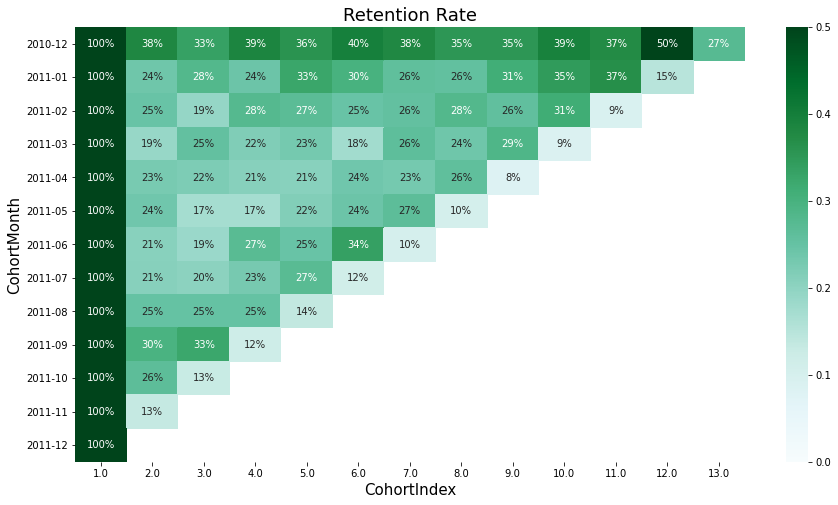

In [15]:
plt.figure(figsize=(15,8))
plt.title("Retention Rate", fontsize= 18)
plt.xlabel('Cohort Index', fontsize= 15);
plt.ylabel('Cohort Month', fontsize= 15);
sns.heatmap(data=retention, annot=True, fmt='.0%', vmin=0.0, vmax=0.5, cmap="BuGn")
plt.show()

***The above figure shows the customer retention of ecach cohort customers. For eg. in the first cohort if we look at in the 2nd month, 38% of the customers are retained from 1st month 100%.***

# Net Revenue by Cohort & Net Revenue Retention

In [16]:
grouping1 = df.groupby(['CohortMonth', 'CohortIndex'])['UnitPrice'].sum().reset_index()
grouping1

,CohortMonth,CohortIndex,UnitPrice
0,2010-12,1.0,86057.19
1,2010-12,2.0,34635.49
2,2010-12,3.0,29418.28
3,2010-12,4.0,43444.48
4,2010-12,5.0,29582.95
...,...,...,...
86,2011-10,2.0,9727.03
87,2011-10,3.0,2365.29
88,2011-11,1.0,29617.62
89,2011-11,2.0,2671.64


In [17]:
net_revenue = grouping1.pivot(index="CohortMonth",
                                  columns="CohortIndex",
                                  values="UnitPrice")
net_revenue

CohortIndex,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
CohortMonth,,,,,,,,,,,,,
2010-12,86057.190,34635.49,29418.28,43444.48,29582.95,62726.69,37617.98,38597.76,41930.210,45459.09,47368.41,65024.22,20437.32
2011-01,38566.830,8731.14,9406.31,19836.75,12069.41,10454.04,8384.81,8155.77,10501.821,28212.55,18784.57,3942.03,NaN
2011-02,29380.010,6621.20,9290.15,7685.17,6626.21,5733.31,6193.75,8555.89,8582.180,8615.32,1399.45,NaN,NaN
2011-03,36711.250,7353.28,9148.97,7802.21,8793.62,5866.63,7939.84,9971.05,11411.520,2449.01,NaN,NaN,NaN
2011-04,25054.591,5683.95,4392.57,3478.45,4209.81,5972.19,5592.52,6202.12,1387.830,NaN,NaN,NaN,NaN
2011-05,28223.470,3632.18,2356.06,2914.00,3967.89,5835.78,5088.14,2039.34,NaN,NaN,NaN,NaN,NaN
2011-06,58776.260,2984.37,2448.74,4278.90,4413.35,8820.60,1421.61,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,22426.141,1827.26,3715.69,3735.53,4422.20,1252.16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,14580.580,8689.89,16345.55,19575.87,6181.21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


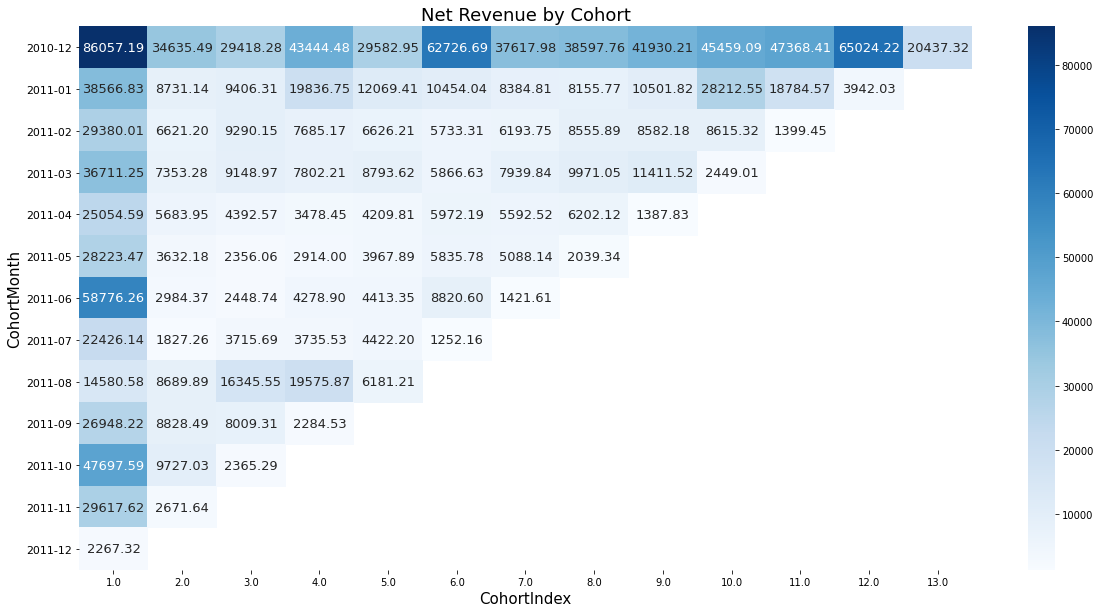

In [18]:
plt.figure(figsize=(20,10))
plt.title("Net Revenue by Cohort", fontsize= 18)
plt.xlabel('Cohort Index', fontsize= 15);
plt.ylabel('Cohort Month', fontsize= 15);
plt.yticks(fontsize=11);
sns.heatmap(data=net_revenue, annot=True, fmt= '.2f', cmap="Blues", annot_kws={"fontsize":13})
plt.show()

In [19]:
cohort_size1 = net_revenue.iloc[:,0]
cohort_size1

CohortMonth
2010-12    86057.190
2011-01    38566.830
2011-02    29380.010
2011-03    36711.250
2011-04    25054.591
2011-05    28223.470
2011-06    58776.260
2011-07    22426.141
2011-08    14580.580
2011-09    26948.221
2011-10    47697.590
2011-11    29617.620
2011-12     2267.320
Freq: M, Name: 1.0, dtype: float64

In [20]:
net_revenue_retention = net_revenue.divide(cohort_size1, axis= 0)
net_revenue_retention

CohortIndex,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
CohortMonth,,,,,,,,,,,,,
2010-12,1.0,0.402471,0.341846,0.504833,0.343759,0.728895,0.437128,0.448513,0.487237,0.528243,0.550429,0.755593,0.237485
2011-01,1.0,0.226390,0.243896,0.514347,0.312948,0.271063,0.217410,0.211471,0.272302,0.731524,0.487065,0.102213,NaN
2011-02,1.0,0.225364,0.316206,0.261578,0.225535,0.195143,0.210815,0.291215,0.292109,0.293237,0.047633,NaN,NaN
2011-03,1.0,0.200300,0.249214,0.212529,0.239535,0.159805,0.216278,0.271607,0.310845,0.066710,NaN,NaN,NaN
2011-04,1.0,0.226863,0.175320,0.138835,0.168025,0.238367,0.223213,0.247544,0.055392,NaN,NaN,NaN,NaN
2011-05,1.0,0.128694,0.083479,0.103247,0.140588,0.206770,0.180280,0.072257,NaN,NaN,NaN,NaN,NaN
2011-06,1.0,0.050775,0.041662,0.072800,0.075087,0.150071,0.024187,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,1.0,0.081479,0.165686,0.166570,0.197190,0.055835,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,1.0,0.595991,1.121049,1.342599,0.423934,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


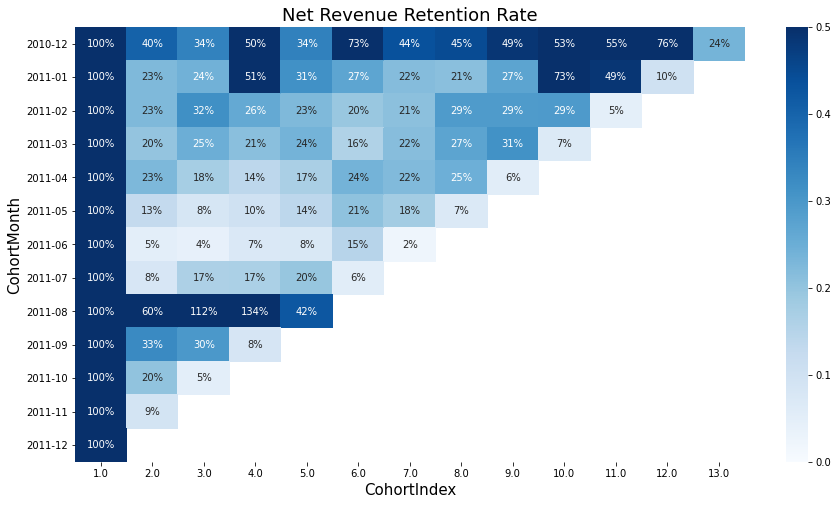

In [21]:
plt.figure(figsize=(15,8))
plt.title("Net Revenue Retention Rate", fontsize= 18)
plt.xlabel('Cohort Index', fontsize= 15);
plt.ylabel('Cohort Month', fontsize= 15);
sns.heatmap(data=net_revenue_retention, annot=True, fmt='.0%', vmin=0.0, vmax=0.5, cmap="Blues")
plt.show()

# Cumulative Lifetime revenue by Cohort

In [22]:
cumulative_lifetime_revenue = net_revenue.cumsum(axis=1)
cumulative_lifetime_revenue

CohortIndex,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
CohortMonth,,,,,,,,,,,,,
2010-12,86057.190,120692.680,150110.960,193555.440,223138.390,285865.080,323483.060,362080.820,404011.030,449470.120,496838.530,561862.750,582300.07
2011-01,38566.830,47297.970,56704.280,76541.030,88610.440,99064.480,107449.290,115605.060,126106.881,154319.431,173104.001,177046.031,NaN
2011-02,29380.010,36001.210,45291.360,52976.530,59602.740,65336.050,71529.800,80085.690,88667.870,97283.190,98682.640,NaN,NaN
2011-03,36711.250,44064.530,53213.500,61015.710,69809.330,75675.960,83615.800,93586.850,104998.370,107447.380,NaN,NaN,NaN
2011-04,25054.591,30738.541,35131.111,38609.561,42819.371,48791.561,54384.081,60586.201,61974.031,NaN,NaN,NaN,NaN
2011-05,28223.470,31855.650,34211.710,37125.710,41093.600,46929.380,52017.520,54056.860,NaN,NaN,NaN,NaN,NaN
2011-06,58776.260,61760.630,64209.370,68488.270,72901.620,81722.220,83143.830,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,22426.141,24253.401,27969.091,31704.621,36126.821,37378.981,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,14580.580,23270.470,39616.020,59191.890,65373.100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


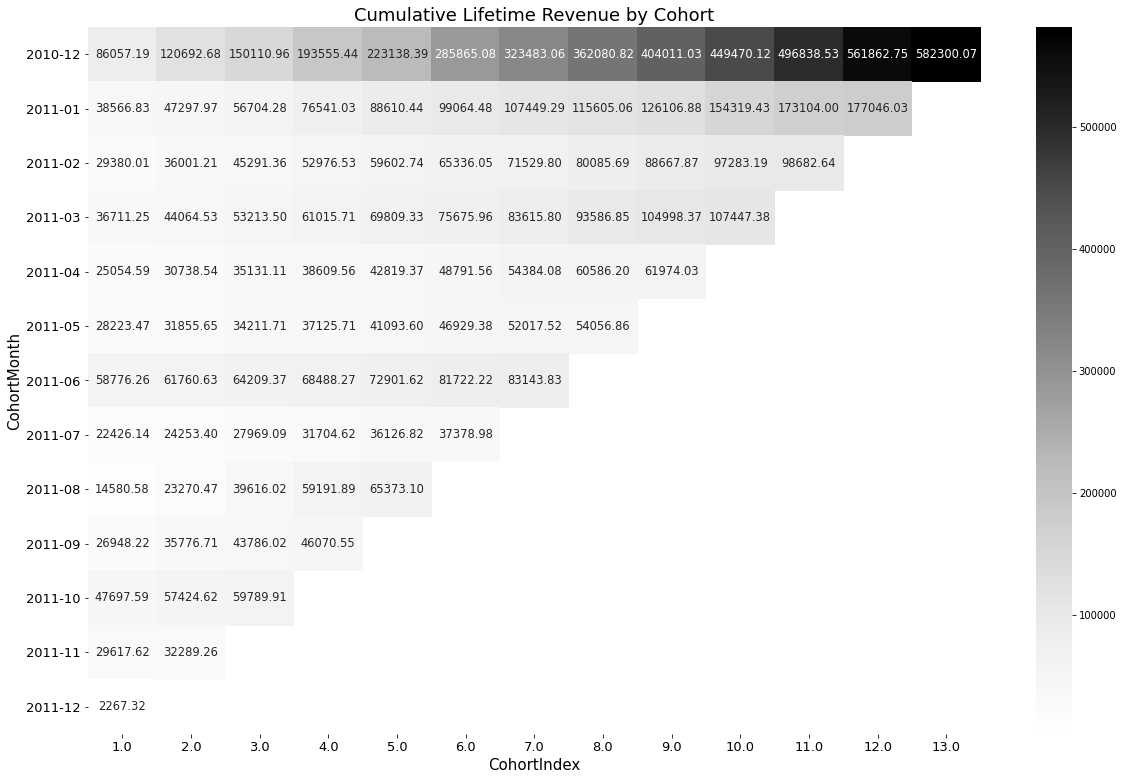

In [23]:
plt.figure(figsize=(20,13))
plt.title("Cumulative Lifetime Revenue by Cohort", fontsize= 18)
plt.xlabel('Cohort Index', fontsize= 15);
plt.ylabel('Cohort Month', fontsize= 15);
plt.xticks(fontsize=13);
plt.yticks(fontsize=13);
sns.heatmap(data= cumulative_lifetime_revenue, annot=True, fmt= '.2f', cmap="Greys", annot_kws={"fontsize":11.5})
plt.show()

# Customer Lifetime Revenue by Cohort

In [24]:
customer_lifetime_revenue = cumulative_lifetime_revenue/customer_cohort
customer_lifetime_revenue

CohortIndex,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
CohortMonth,,,,,,,,,,,,,
2010-12,90.777627,333.405193,473.536151,527.399019,654.364780,760.279468,898.564056,1077.621488,1202.413780,1201.791765,1403.498672,1185.364451,2239.615654
2011-01,91.607672,468.296733,476.506555,750.402255,642.104638,786.226032,976.811727,1070.417222,962.647947,1056.982404,1116.800006,2810.254460,NaN
2011-02,77.315816,382.991596,620.429589,499.778585,584.340588,695.064362,737.420619,748.464393,904.774184,817.505798,2819.504000,NaN,NaN
2011-03,83.434659,524.577738,475.120536,635.580312,684.405196,970.204615,720.825862,891.303333,826.758819,2755.061026,NaN,NaN,NaN
2011-04,83.794619,452.037368,532.289561,612.850175,690.635016,687.205085,788.175087,776.746167,2478.961240,NaN,NaN,NaN,NaN
2011-05,101.159391,482.661364,712.743958,773.452292,684.893333,690.137941,702.939459,1864.029655,NaN,NaN,NaN,NaN,NaN
2011-06,250.111745,1260.421020,1459.303864,1070.129219,1256.924483,1034.458481,3464.326250,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,117.414351,606.335025,717.156179,720.559568,694.746558,1699.044591,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,87.308862,554.058810,943.238571,1409.330714,2842.308696,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



"This shows the revenue generated on an average by each customer in the respective cohort month series"


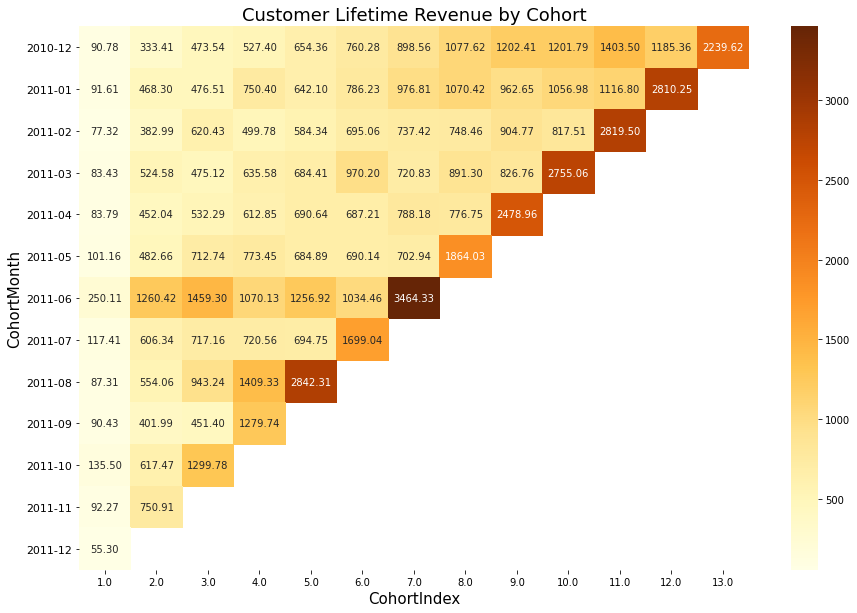

In [25]:
print()
print("\"This shows the revenue generated on an average by each customer in the respective cohort month series\"")
plt.figure(figsize=(15,10))
plt.title("Customer Lifetime Revenue by Cohort", fontsize= 18)
plt.xlabel('Cohort Index', fontsize= 15);
plt.ylabel('Cohort Month', fontsize= 15);
plt.yticks(fontsize=11);
sns.heatmap(data= customer_lifetime_revenue, annot= True, fmt= '.2f', cmap= "YlOrBr")
plt.show()

# Customer Lifetime Value

### **Assumptions**
1. Gross margin of the company is 65%.
2. Customer Acquisition Cost (CAC) is $115. <br>
<br>
*- Gross margin is the profit made at product level, so it excludes the marketing cost, overhead costs. it's like your revenue minus the direct cost of your product.* <br>
*- Customer acquistion cost is the total amount spended on advertising to get one new customer to buy for their very first time.*

In [26]:
gross_margin = 0.65

In [27]:
customer_lifetime_value = round(customer_lifetime_revenue*gross_margin,2)
customer_lifetime_value

CohortIndex,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
CohortMonth,,,,,,,,,,,,,
2010-12,59.01,216.71,307.80,342.81,425.34,494.18,584.07,700.45,781.57,781.16,912.27,770.49,1455.75
2011-01,59.54,304.39,309.73,487.76,417.37,511.05,634.93,695.77,625.72,687.04,725.92,1826.67,NaN
2011-02,50.26,248.94,403.28,324.86,379.82,451.79,479.32,486.50,588.10,531.38,1832.68,NaN,NaN
2011-03,54.23,340.98,308.83,413.13,444.86,630.63,468.54,579.35,537.39,1790.79,NaN,NaN,NaN
2011-04,54.47,293.82,345.99,398.35,448.91,446.68,512.31,504.89,1611.32,NaN,NaN,NaN,NaN
2011-05,65.75,313.73,463.28,502.74,445.18,448.59,456.91,1211.62,NaN,NaN,NaN,NaN,NaN
2011-06,162.57,819.27,948.55,695.58,817.00,672.40,2251.81,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,76.32,394.12,466.15,468.36,451.59,1104.38,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,56.75,360.14,613.11,916.06,1847.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


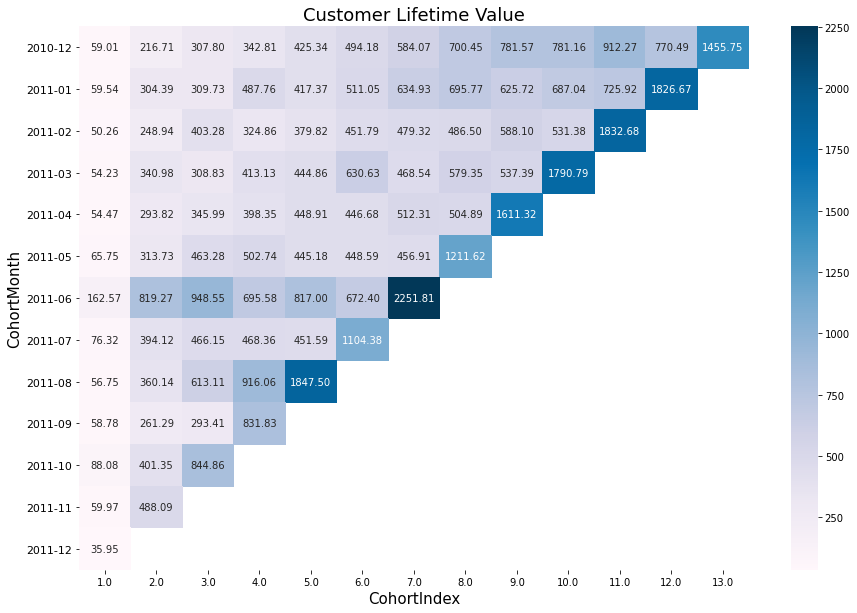

In [28]:
plt.figure(figsize=(15,10))
plt.title("Customer Lifetime Value", fontsize= 18)
plt.xlabel('Cohort Index', fontsize= 15);
plt.ylabel('Cohort Month', fontsize= 15);
plt.yticks(fontsize=11);
sns.heatmap(data= customer_lifetime_value, annot= True, fmt= '.2f', cmap= "PuBu")
plt.show()

### Explanation
**This is the most important metric for any business.** <br>
For example- <br>
Let's say right now the customer acquistion cost is 115 Dollars and taking the customers first purchase in the month of December 2010 which is 90.77 Dollars. Now after spending 115 (CAC), that customer comes on avergae and spends 90.77 Dollars with the company and only 59.01 Dollars of those 90.77 Dollars are profit. <br>
Well if we just look at their first purchase it's like no way as the company made only 59.01 Dollars but if you see that over time, specially at the 13th month, the company has made 1832.68  which is more than marketing cost. <br>
Likewise, we could look at the end of the year or half yearly profit and compare it with the CAC and then can decide the cost to be spend on marketing.